When I tell people that I have a great pizza delivery dataset that I collected while delivering for Domino's with my wife,  one of the most common questions I get are:

*Who tips better, men or women?*
*Who gets better tips, you? or your wife?*

These are interesting questions but I think the follow-up questions are just as interesting. Which gender tips me, or my wife, better? And by how much? I certainly don't mean this analysis to be a battle of the genders, but it will be interesting to see what the statistics say!

![Domino's](http://www.pizzadelivery.org/Portals/0/ContentImages/xebra_dominos_store.jpg)

The very first question I want to answer is; are the overall means of tips different between me and Sammie, my wife?

**H0 : mu_a = mu_s**

**HA: mu_a != mu_s**

In [2]:
%matplotlib inline
import pandas as pd
import math
#import scipy.stats as stats #not working right now?
import numpy as np

path = r'C:\Users\angelddaz\OneDrive\Documents\data_training\data\RawDelData.csv' #please fix file location
data = pd.read_csv(path)
df = pd.DataFrame(data, columns = ['Tip', 'PersonWhoDelivered'])

aDels = data.loc[data['PersonWhoDelivered']=='Angel'][['Tip']]
sDels = data.loc[data['PersonWhoDelivered']=='Sammie'][['Tip']]

mu_a = aDels.mean() #Angel Delivery mean = 3.376236
mu_s = sDels.mean() #Sammie Delivery mean = 3.412869
sigma_a = aDels.std() #Angel stdev = 2.184814
sigma_s = sDels.std() #Sammie stdev = 2.040795
variance_a = aDels.std() * aDels.std() #Angel variance = 4.773414
variance_s = sDels.std() * sDels.std() #Sammie variance = 4.164844
n_a = aDels.count() #Angel sample size = 712
n_s = sDels.count() #Sammie sample size = 589
df = n_a + n_s - 2 -1 #n-k-1: degrees of freedom = 1298

#This is where the Hypothesis starts:
#Two Sample T Test
den1 = variance_a/n_a #formula chunk: 0.006704
den2 = variance_s/n_s #formula chunk: 0.007071
den3 = den1+den2      #formula chunk: 0.013775
den = math.sqrt(den3) #denominator value: 0.11736812016136079
num = mu_a - mu_s     #numerator value: -0.036633


t_crit = 1.9673
t_stat = num/den
print 't stat:'
print t_stat
print 'p val:'
#pval = 1-scipy.stats.t.sf(t_stat, df) #not working right now
#print pval
'''
if float(t_stat) < float(t_crit):
    print("We fail to reject the null hypothesis that the two means are statistically the same.")
    print("Therefore, we can conclude with some certainty that the two tips means are equal.")
    print('t-statistic = %6.3f pvalue = %6.4f' % (t_stat, pval))
else:
    print("We reject the null hypothesis that the two means are statistically the same.")'''

t stat:
Tip   -0.312123
dtype: float64
p val:


'\nif float(t_stat) < float(t_crit):\n    print("We fail to reject the null hypothesis that the two means are statistically the same.")\n    print("Therefore, we can conclude with some certainty that the two tips means are equal.")\n    print(\'t-statistic = %6.3f pvalue = %6.4f\' % (t_stat, pval))\nelse:\n    print("We reject the null hypothesis that the two means are statistically the same.")'

My tip mean is 3.376236 and Sammie's tip mean is 3.412869. As a whole, they're pretty much the same.

Now it's time to look at the data, no fancy statistics, just counts and means, broken down by genders.

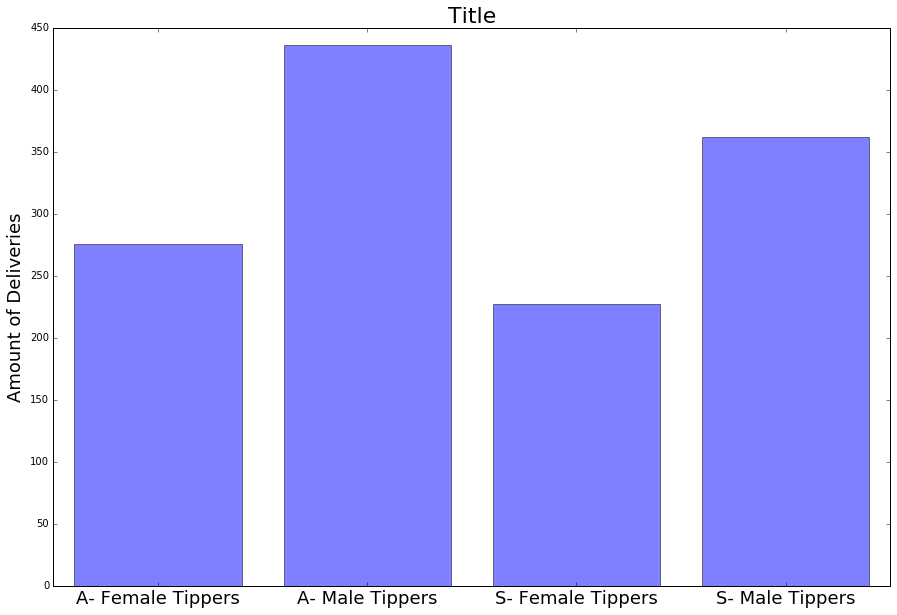

Angel- Female Tippers:  276
Angel- Male Tippers:  436
Sammie- Female Tippers:  227
Sammie- Male Tippers:  362


In [4]:
aDels = data.loc[data['PersonWhoDelivered']=='Angel'][['Tip', 'GenderOfTipper']]
sDels = data.loc[data['PersonWhoDelivered']=='Sammie'][['Tip', 'GenderOfTipper']]

afem = 0 #female tippers for me
amale = 0
sfem = 0
smale = 0
for i in aDels['GenderOfTipper']:
    if i == 'Female':
        afem = afem + 1
    elif i == 'Male':
        amale = amale + 1
        
for i in sDels['GenderOfTipper']:
    if i == 'Female':
        sfem = sfem + 1
    elif i == 'Male':
        smale = smale + 1

import matplotlib.pyplot as pl

#building a bar chart
objects = ('A- Female Tippers', 'A- Male Tippers', 'S- Female Tippers', 'S- Male Tippers')
y_pos = np.arange(len(objects))
xvals = [afem, amale, sfem, smale]

pl.bar(y_pos, xvals, align='center', alpha=0.5)
pl.xticks(y_pos, objects, fontsize=18)
pl.ylabel('Amount of Deliveries', fontsize=18)
pl.title('Number of Tippers by Gender', fontsize=22)
pl.rcParams['figure.figsize'] = (15, 10)
pl.show()

print "Angel- Female Tippers: ",afem
print "Angel- Male Tippers: ",amale
print "Sammie- Female Tippers: ",sfem
print "Sammie- Male Tippers: ",smale

The next step is to see the actual averages both Sam and I received from each gender:

In [48]:
aFsum = aDels.loc[aDels['GenderOfTipper'] == 'Female', 'Tip'].sum() 
aMsum = aDels.loc[aDels['GenderOfTipper'] == 'Male', 'Tip'].sum()
sFsum = sDels.loc[sDels['GenderOfTipper'] == 'Female', 'Tip'].sum()
sMsum = sDels.loc[sDels['GenderOfTipper'] == 'Male', 'Tip'].sum()

print "Sum of Angel Female Tips:", aFsum
print "Sum of Angel Male Tips:", aMsum
print "Sum of Sammie Female Tips:", sFsum
print "Sum of Sammie Male Tips:", sMsum

#fix fix fix
aFsum = aDels.loc[aDels['GenderOfTipper'] == 'Female', 'Tip'].count()
aMsum = aDels.loc[aDels['GenderOfTipper'] == 'Male', 'Tip'].sum()
sFsum = sDels.loc[sDels['GenderOfTipper'] == 'Female', 'Tip'].sum()
sMsum = sDels.loc[sDels['GenderOfTipper'] == 'Male', 'Tip'].sum()


lala = aFsum.count()
print lala

aFavg = aFsum
aMavg = aMsum
sFavg = sFsum
sMavg = sMsum


#The following two lines are to confirm that my 'queries' work. They seem to have worked.
#aFDels = aDels.loc[data['GenderOfTipper']=='Female'][['Tip', 'GenderOfTipper']] #Angel Female deliveries
#print aFDels.tail() 


Tip = aFDels.Tip

aFemSum = aFDels.sum(axis=1)
aMaleSum = 0
sFemSum = 0
sMaleSum = 0

Sum of Angel Female Tips: 889.45
Sum of Angel Male Tips: 1514.43
Sum of Sammie Female Tips: 764.32
Sum of Sammie Male Tips: 1245.86


AttributeError: 'numpy.int32' object has no attribute 'count'